In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data_train = pd.read_csv('data/train.csv')
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Preprocess

In [3]:
data_train = data_train.replace(['female', 'male'], [0, 1])
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_train.drop('Cabin',axis=1,inplace=True)

data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# 28+38 /2 = 33
data_train['Age'].fillna(33,inplace=True)

data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [7]:
data_train.dropna(inplace=True,axis=0)

data_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
le = LabelEncoder()
data_train['Embarked'] = le.fit_transform(data_train['Embarked'])
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [9]:
X_train = np.array(data_train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])
Y_train = np.array(data_train[['Survived']])

#### MLP - Model

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
loss=tf.losses.sparse_categorical_crossentropy,
metrics=['accuracy'])

In [24]:
# train
train_output = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
28/28 [==============================] - 0s 5ms/step - loss: 0.3858 - accuracy: 0.8200
Epoch 2/200
28/28 [==============================] - 0s 5ms/step - loss: 0.4011 - accuracy: 0.8200
Epoch 3/200
28/28 [==============================] - 0s 6ms/step - loss: 0.3921 - accuracy: 0.8301
Epoch 4/200
28/28 [==============================] - 0s 5ms/step - loss: 0.4110 - accuracy: 0.8166
Epoch 5/200
28/28 [==============================] - 0s 5ms/step - loss: 0.4101 - accuracy: 0.8211
Epoch 6/200
28/28 [==============================] - 0s 8ms/step - loss: 0.3936 - accuracy: 0.8279
Epoch 7/200
28/28 [==============================] - 0s 5ms/step - loss: 0.4101 - accuracy: 0.8324
Epoch 8/200
28/28 [==============================] - 0s 5ms/step - loss: 0.3975 - accuracy: 0.8301
Epoch 9/200
28/28 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8279
Epoch 10/200
28/28 [==============================] - 0s 5ms/step - loss: 0.3933 - accuracy: 0.8268
Epoch 11/

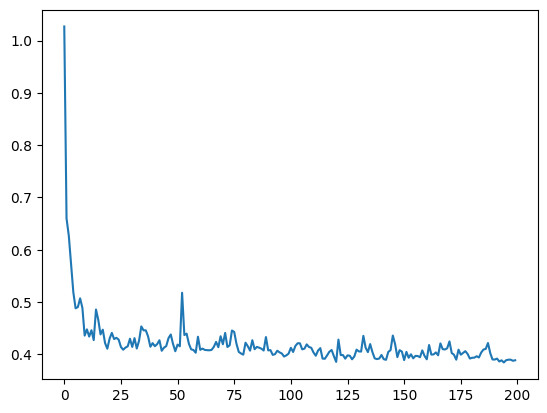

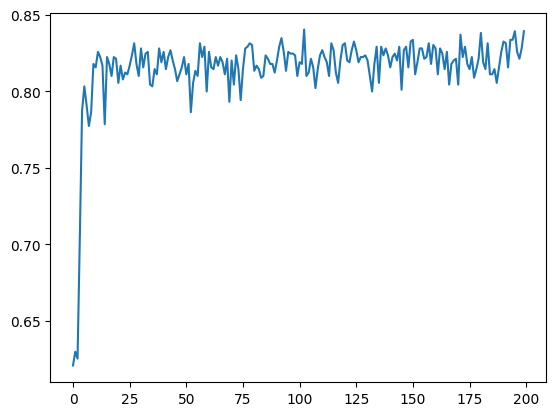

In [13]:
plt.plot(train_output.history['loss'])
plt.show()
plt.plot(train_output.history['accuracy'])
plt.show()

In [14]:
data_test = pd.read_csv('data/test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
data_test_survive = pd.read_csv('data/gender_submission.csv')
data_test_survive.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [16]:
data_test['Survived'] = data_test_survive[['Survived']]
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [17]:
data_test.drop('Cabin',axis=1,inplace=True)
data_test['Age'].fillna(33,inplace=True)
data_test.dropna(inplace=True,axis=0)
le = LabelEncoder()
data_test['Embarked'] = le.fit_transform(data_test['Embarked'])
data_test = data_test.replace(['female', 'male'], [0, 1])

X_test = np.array(data_test[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']])
Y_test = np.array(data_test[['Survived']])

In [18]:
model.evaluate(X_test, Y_test)

14/14 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.9281


[0.3096151649951935, 0.9280575513839722]

### KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)

c:\Users\98915\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [20]:
Y_pred = neigh.predict(X_test)

c:\Users\98915\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [21]:
from sklearn.metrics import accuracy_score

knn_accuracy = accuracy_score(Y_test, Y_pred)
knn_accuracy

0.7266187050359713

### Perceptron

In [22]:
class Perceptron:
    def __init__(self, epochs=200, lr=0.00001):
        self.w = np.random.rand(6, 1)
        self.b = np.random.rand(1, 1)
        self.lr = lr
        self.epochs = epochs

    def fit(self, x_train, y_train):
        for epoch in range(self.epochs):
            for i in range(x_train.shape[0]):    
                y_pred = np.matmul(x_train[i], self.w) + self.b
                err = y_train[i] - y_pred
                self.w += (self.lr * x_train[i, :].T * err).T
                self.b += self.lr * err

    def predict(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        return y_pred

    def evaluate(self, X, Y):
        y_pred = np.matmul(X, self.w) + self.b
        y_pred = np.where(y_pred < 0.5, 0, 1)
        return accuracy_score(Y, y_pred)

In [23]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
y_pred = perceptron.predict(X_test)
eval = perceptron.evaluate(X_test, Y_test)
eval

0.47721822541966424